In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
sns.set_theme(style="whitegrid")

beer_style
Faro                                   53
Happoshu                               55
Gose                                   90
Kvass                                 118
Sahti                                 139
                                    ...  
American Amber / Red Ale            18731
American Pale Ale (APA)             20520
American Double / Imperial Stout    23354
American Double / Imperial IPA      26106
American IPA                        43369
Name: beer_style, Length: 104, dtype: int64


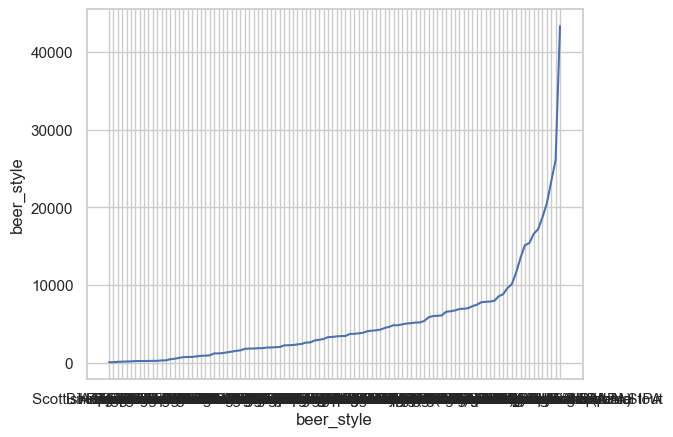

In [48]:
bee = pd.read_csv('BeerProject.csv', encoding_errors='ignore')
beers = bee.groupby(["beer_style"]).beer_style.count().sort_values()

sns.lineplot(data = beers)

print(beers)

                     beer_style  style_count
0                       Altbier         3708
1        American Adjunct Lager         9613
2      American Amber / Red Ale        18731
3    American Amber / Red Lager         2935
4           American Barleywine        10108
..                          ...          ...
99                 Vienna Lager         4609
100                  Weizenbock         2237
101                   Wheatwine          891
102               Winter Warmer         5995
103                     Witbier        13535

[104 rows x 2 columns]


<AxesSubplot: >

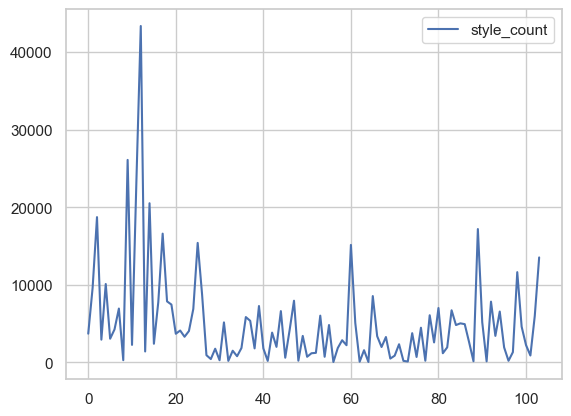

In [47]:
q = "SELECT beer_style, COUNT(beer_style) AS style_count FROM bee GROUP BY beer_style"


qu = sqldf(q)


print(qu)
sns.lineplot(qu)

In [72]:
newBeers2 = qu[qu.style_count > 10000]

print(newBeers2)

newBeers = newBeers2.beer_style.tolist()

print(newBeers)

                           beer_style  style_count
2            American Amber / Red Ale        18731
4                 American Barleywine        10108
9      American Double / Imperial IPA        26106
11   American Double / Imperial Stout        23354
12                       American IPA        43369
14            American Pale Ale (APA)        20520
17                    American Porter        16601
25            Belgian Strong Dark Ale        15407
60             Fruit / Vegetable Beer        15148
89             Russian Imperial Stout        17192
98                             Tripel        11637
103                           Witbier        13535
['American Amber / Red Ale', 'American Barleywine', 'American Double / Imperial IPA', 'American Double / Imperial Stout', 'American IPA', 'American Pale Ale (APA)', 'American Porter', 'Belgian Strong Dark Ale', 'Fruit / Vegetable Beer', 'Russian Imperial Stout', 'Tripel', 'Witbier']


In [64]:
newDataFrame = bee[bee.beer_style.isin(newBeers)]
print(newDataFrame)

        beer_ABV  beer_beerId  beer_brewerId          beer_name  \
4            7.7        64883           1075      Cauldron DIPA   
59           5.5        25414           1075   Caldera Pale Ale   
60           5.5        25414           1075   Caldera Pale Ale   
61           5.5        25414           1075   Caldera Pale Ale   
62           5.5        25414           1075   Caldera Pale Ale   
...          ...          ...            ...                ...   
528761       NaN        38278          11492  Methow Valley IPA   
528768       7.5        38823          13004    Marcus Aurelius   
528769       7.5        38823          13004    Marcus Aurelius   
528770       7.5        38823          13004    Marcus Aurelius   
528782       3.7        32689          13004  Vindolanda Spelta   

                            beer_style  review_appearance  review_palette  \
4       American Double / Imperial IPA                4.0             4.5   
59             American Pale Ale (APA)   

In [74]:
reindexed = newDataFrame.reset_index()
print(reindexed)

         index  beer_ABV  beer_beerId  beer_brewerId          beer_name  \
0            4       7.7        64883           1075      Cauldron DIPA   
1           59       5.5        25414           1075   Caldera Pale Ale   
2           60       5.5        25414           1075   Caldera Pale Ale   
3           61       5.5        25414           1075   Caldera Pale Ale   
4           62       5.5        25414           1075   Caldera Pale Ale   
...        ...       ...          ...            ...                ...   
231703  528761       NaN        38278          11492  Methow Valley IPA   
231704  528768       7.5        38823          13004    Marcus Aurelius   
231705  528769       7.5        38823          13004    Marcus Aurelius   
231706  528770       7.5        38823          13004    Marcus Aurelius   
231707  528782       3.7        32689          13004  Vindolanda Spelta   

                            beer_style  review_appearance  review_palette  \
0       American Doubl

In [ ]:
reindexed.to_csv('Beers.csv')

## TABLICE

In [28]:
groupByStyle = beers.groupby(["beer_style"]).beer_style.count().sort_values(ascending = False)

print(groupByStyle)

AttributeError: 'SeriesGroupBy' object has no attribute 'beer_style'

## Korisnici sa Najvise Reviewova

#### Korisnici poredani po broju reviewova i kolicinom pozitivnih reviewova

In [7]:
profileNameDatasetQuery = "SELECT review_profileName, COUNT(review_profileName) AS review_count, SUM(CASE WHEN review_overall > 3 THEN 1 ELSE 0 END) AS positive_ratings FROM beers GROUP BY review_profileName ORDER BY COUNT (review_profileName) DESC LIMIT 20"
profileNameDataset = sqldf(profileNameDatasetQuery)

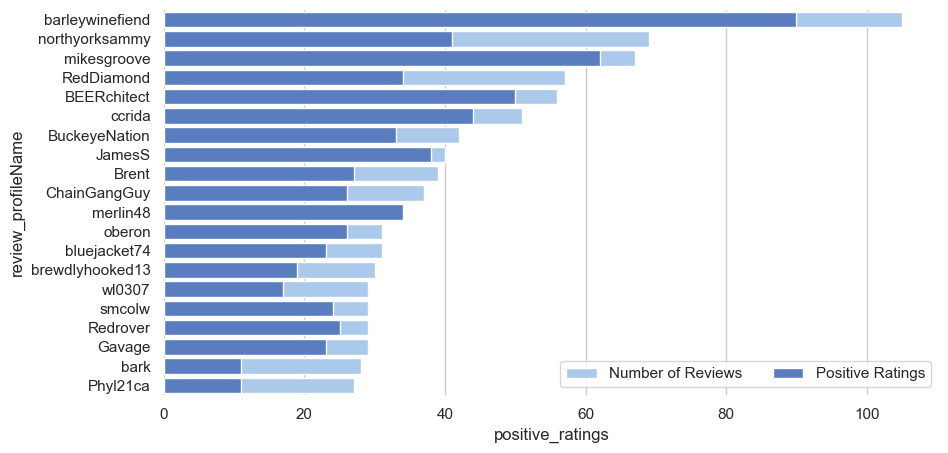

In [8]:
f, ax = plt.subplots(figsize=(10, 5))

sns.set_color_codes("pastel")
sns.barplot(x="review_count", y="review_profileName", data=profileNameDataset, label="Number of Reviews", color="b")

sns.set_color_codes("muted")
sns.barplot(x="positive_ratings", y="review_profileName", data=profileNameDataset,
            label="Positive Ratings", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

## Popularni Stilovi Pive

In [5]:
famousBeerStyleQuery = "SELECT beer_style, AVG(review_taste) as beer_taste, AVG(review_aroma) AS beer_aroma, AVG(review_overall) as overall, COUNT(beer_style) AS style_count FROM beers GROUP BY beer_style ORDER BY style_count DESC LIMIT 20"
famousBeerStyle = sqldf(famousBeerStyleQuery)

print(famousBeerStyle.head(3))

                beer_style  beer_taste  beer_aroma   overall  style_count
0   Russian Imperial Stout    4.269598    4.285532  4.149458         1569
1             American IPA    3.815421    3.845327  3.892991         1070
2  American Pale Ale (APA)    3.643084    3.665342  3.780604          629


## Kolicina Alkohola u Pivi

#### Postotak ABV

C:\Users\dinoz\AppData\Local\Temp\ipykernel_2232\1538900217.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(beers['beer_ABV'],bins = 50)


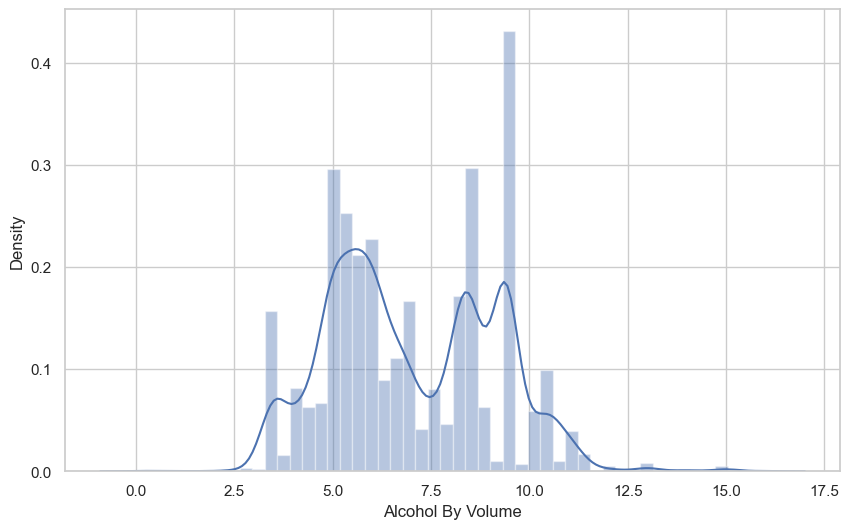

In [6]:
plt.figure(figsize=(10,6))
sns.distplot(beers['beer_ABV'],bins = 50)
plt.xlabel("Alcohol By Volume")
plt.show()

#### Distribucija Kolicine Alkohola

In [7]:
alcoholVolumesQuery = "SELECT beer_ABV FROM beers"
alcoholVolumes = sqldf(alcoholVolumesQuery)

<AxesSubplot: ylabel='beer_ABV'>

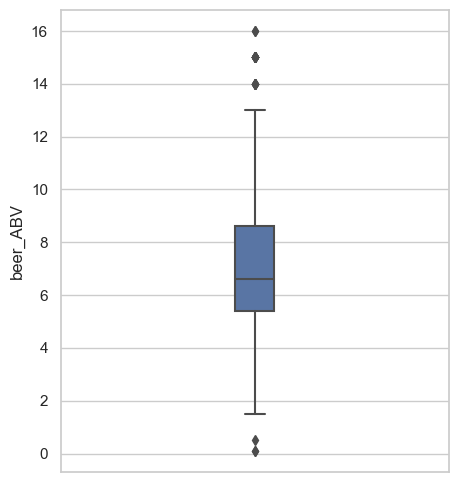

In [8]:
plt.figure(figsize=(5,6))

sns.boxplot(data = alcoholVolumes, y="beer_ABV", width=0.1)

#### Utjecaj Kolicine Alkohola Na Review

In [9]:
# Create the data
tenBeersQuery = "SELECT beer_style, Count(beer_style) AS count FROM beers GROUP BY beer_style ORDER BY count DESC LIMIT 10"
tenBeersDataframe = sqldf(tenBeersQuery)

stylesArray = tenBeersDataframe["beer_style"].values.tolist()

tenBeers = beers[beers['beer_style'].isin(stylesArray)]

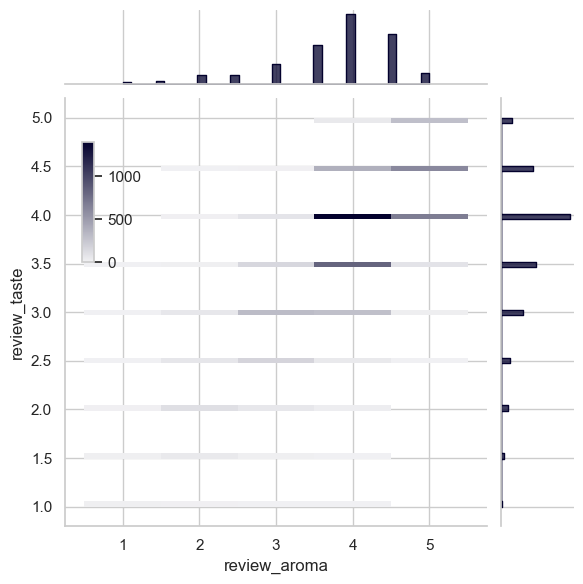

In [10]:
data = sns.JointGrid(data=tenBeers, x = "review_aroma", y = "review_taste")

cax = data.figure.add_axes([.15, .55, .02, .2])

data.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=2, cbar=True, cbar_ax=cax
)
data.plot_marginals(sns.histplot, element="step", color="#03012d")

In [ ]:
palette = sns.color_palette("Set2", 12)
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})

g = sns.FacetGrid(beers, palette=palette, row="beer_style", hue="beer_style", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="beer_ABV", fill=True, alpha=1, warn_singular=False)
g.map_dataframe(sns.kdeplot, x="beer_ABV", color='black', warn_singular=False)
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "beer_style")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="beer_ABV")
g.despine( left=True)
plt.suptitle('Alcohol volume in famous beer styles', y=0.98)